# Лабораторная работа №3

In [7]:
import numpy as np
from scipy.stats import *
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import statsmodels.api as sm
from statsmodels.formula.api import ols
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

**Задание 1. Indian liver pations records.**

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2. Оценить объемы выборок пациентов обоих групп.

In [51]:
len(data[data['Dataset']==1])

416

In [52]:
len(data[data['Dataset']==2])

167

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [5]:
data['Direct_Bilirubin'].fillna(0, inplace = True)
data['Total_Bilirubin'].fillna(0, inplace = True)
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin'] 

In [8]:
pearsonr(direct_bilirubin, total_bilirubin)

(0.8746179301164123, 7.873553178042517e-185)

In [9]:
data[['Direct_Bilirubin', 'Total_Bilirubin']].cov()

,Direct_Bilirubin,Total_Bilirubin
Direct_Bilirubin,7.887659,15.252836
Total_Bilirubin,15.252836,38.558160


In [11]:
print("Коэффициент корреляции Пирсона" ,15.252836/(statistics.pstdev(direct_bilirubin)*statistics.pstdev(total_bilirubin))

Коэффициент корреляции Пирсона 0.8761207374582995


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [12]:
Direct_Bilirubin = np.array(direct_bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(total_bilirubin).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
Direct_Bilirubin,
Total_Bilirubin,
test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

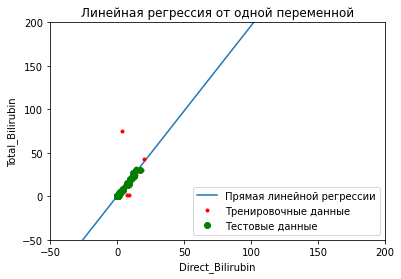

In [13]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Посчитать квантилей 10%, 25%, 50%, 75% для колонок Age, Direct_Bilirubin и Total_Bilirubin таблицы data

In [53]:
age = data['Age']
print("Квантиль 10% : ", np.quantile(age, .1))
print("Квантиль 25% : ", np.quantile(age, .25))  
print("Квантиль 50% : ", np.quantile(age, .50))
print("Квантиль 75% : ", np.quantile(age, .75))


Квантиль 10% :  23.0
Квантиль 25% :  33.0
Квантиль 50% :  45.0
Квантиль 75% :  58.0


In [54]:
Direct_Bilirubin = data['Direct_Bilirubin']
print("Квантиль 10% : ", np.quantile(Direct_Bilirubin, .1))
print("Квантиль 25% : ", np.quantile(Direct_Bilirubin, .25))  
print("Квантиль 50% : ", np.quantile(Direct_Bilirubin, .50))
print("Квантиль 75% : ", np.quantile(Direct_Bilirubin, .75))

Квантиль 10% :  0.1
Квантиль 25% :  0.2
Квантиль 50% :  0.3
Квантиль 75% :  1.3


In [55]:
Total_Bilirubin= data['Total_Bilirubin']
print("Квантиль 10% : ", np.quantile(Total_Bilirubin, .1))
print("Квантиль 25% : ", np.quantile(Total_Bilirubin, .25))  
print("Квантиль 50% : ", np.quantile(Total_Bilirubin, .50))
print("Квантиль 75% : ", np.quantile(Total_Bilirubin, .75))

Квантиль 10% :  0.7
Квантиль 25% :  0.8
Квантиль 50% :  1.0
Квантиль 75% :  2.6


Пример, как считать квантили:

In [ ]:
age = data['Age']

In [ ]:
print("Q2 квантиль ряда : ", np.quantile(age, .50))  

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квантиль 0.5 в данных выборках. Чем они отличаются?

In [56]:
direct_bilirubin_less50=direct_bilirubin[data['Age']<50]
direct_bilirubin_less50.head()

5     0.7
6     0.2
7     0.3
8     0.3
15    0.1
Name: Direct_Bilirubin, dtype: float64

In [57]:
direct_bilirubin_more50=direct_bilirubin[data['Age']>=50]
direct_bilirubin_more50.head()

0    0.1
1    5.5
2    4.1
3    0.4
4    2.0
Name: Direct_Bilirubin, dtype: float64

Text(0.5, 0, 'Direct_Bilirubin')

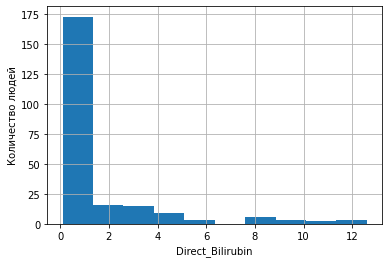

In [20]:
df=direct_bilirubin_more50.hist()
df.set_ylabel('Количество людей')
df.set_xlabel('Direct_Bilirubin')

Text(0.5, 0, 'Direct_Bilirubin')

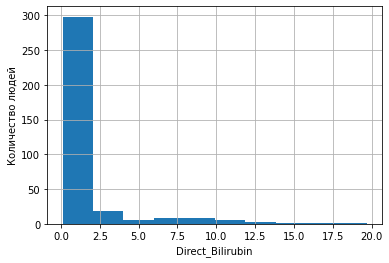

In [21]:
df1=direct_bilirubin_less50.hist()
df1.set_ylabel('Количество людей')
df1.set_xlabel('Direct_Bilirubin')

In [58]:
print("Квантиль 50 % less50:",np.quantile(direct_bilirubin_less50,.50))
print("Среднее значение less50:",direct_bilirubin_less50.mean())

Квантиль 50 % less50: 0.3
Среднее значение less50: 1.4946175637393755


In [59]:
print("Квантиль 50 % more50:",np.quantile(direct_bilirubin_more50,.50))
print("Среднее значение more50:",direct_bilirubin_more50.mean())

Квантиль 50 % more50: 0.4
Среднее значение more50: 1.4730434782608677


Средний квартиль - это значение, расположенное в середине изучаемого массива, в то время как выборочное среднее - это сумма всех значений выборки, деленная на их количество

Посчитать одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [24]:
total_bilirubin_sick=total_bilirubin[data['Dataset']==1]
ttest_1samp(total_bilirubin_sick, 0)

Ttest_1sampResult(statistic=11.888020517106993, pvalue=2.995697191414789e-28)

In [25]:
total_bilirubin_sick.count()-1

415

1.98<11.89  нулевая гипотеза о сходстве отвергается.

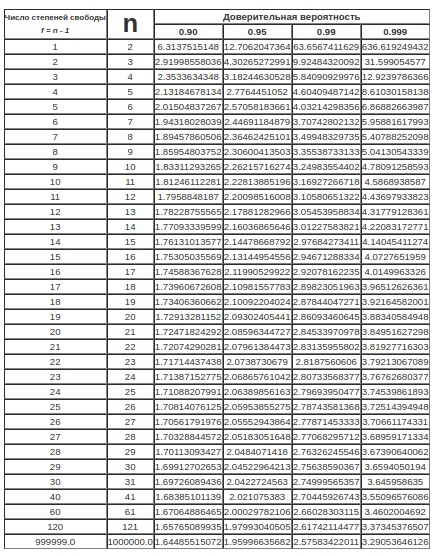

In [ ]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [26]:
total_bilirubin_health=total_bilirubin[data['Dataset']==2]
print(ttest_1samp(total_bilirubin_sick, 0))
ttest_1samp(total_bilirubin_health, 0)

Ttest_1sampResult(statistic=11.888020517106993, pvalue=2.995697191414789e-28)


Ttest_1sampResult(statistic=14.698808917873793, pvalue=7.337914669049984e-32)

Данные группы схожесть по p-value не имеют.

**Задание 2. AUTO.CSV**
1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?
5. Визуализировать несколько взаимосвязей между переменными
6. Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

1.Загрузить файл auto.csv

In [28]:
url="auto.csv"
df=pd.read_csv(url)
df.fillna(0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

2.Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [30]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
df.mode().head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0


3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [60]:
x=df[['symboling', 'normalized-losses',  'make',   'fuel-type',   'aspiration',   'num-of-doors',    'body-style' ,  'drive-wheels', 
    'engine-location',   'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
  'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [61]:
x.corr().style.set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?

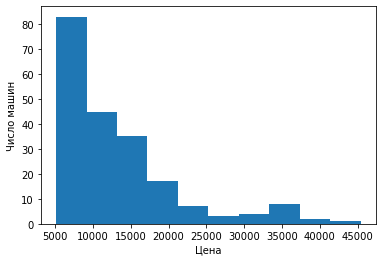

In [38]:
plt.hist(df['price'])
plt.xlabel('Цена')
plt.ylabel('Число машин')
plt.show()

In [63]:
print('skewness: ', df['price'].skew())
print('kurtosis: ', df['price'].kurtosis())

skewness:  1.7663998888191028
kurtosis:  2.948637293212561


По графику распределение похоже на экспоненциальное

5. Визуализировать несколько взаимосвязей между переменными

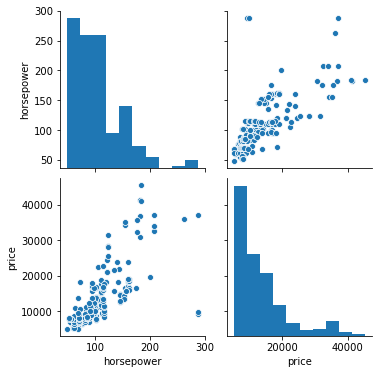

In [42]:
sns.pairplot(df[['horsepower','price']])

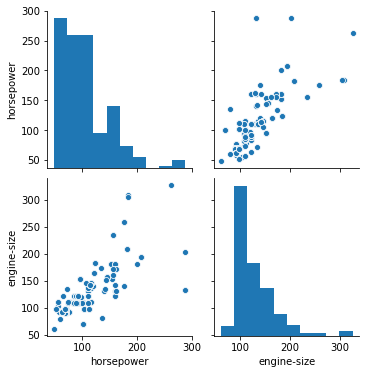

In [47]:
sns.pairplot(df[['horsepower','engine-size']])

6. Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.


 ----1.Чем больше у машины лошадиных сил, тем выше цена.

In [48]:
mean=df['horsepower'].mean()
price = df['price']
less_horsepower=price[df['horsepower']<=mean]
more_horsepower=price[df['horsepower']>=mean]
print(ttest_1samp(less_horsepower, 0))
print(ttest_1samp(more_horsepower, 0))

Ttest_1sampResult(statistic=30.904622072959857, pvalue=1.5274477344805865e-59)
Ttest_1sampResult(statistic=19.675230294803278, pvalue=1.3517665674242836e-32)


Результаты выполнения функции ttest подтвердили гипотезу.Чем больше у машины лошадиных сил, тем выше цена.


----2.Чем больше размер двигателя, тем больше лошадиных сил.

In [50]:
mean=df['engine-size'].mean()
horsepower = df['horsepower']
less_eng_s=horsepower[df['engine-size']<=mean]
more_eng_s=horsepower[df['engine-size']>=mean]
print(ttest_1samp(less_eng_s, 0))
print(ttest_1samp(more_eng_s, 0))

Ttest_1sampResult(statistic=48.58281958672865, pvalue=8.776886790426544e-85)
Ttest_1sampResult(statistic=28.647483740114243, pvalue=8.589897183688715e-42)


Результаты выполнения функции ttest подтвердили гипотезу.Чем больше размер двигателя, тем больше лошадиных сил.
